In [54]:
import numpy as np
import pandas as pd
from tifffile import imread
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import seaborn as sns

In [ ]:
from argparse import ArgumentParser

In [ ]:
def parse_args():

    parser = ArgumentParser()

    parser.add_argument('output_csv', type=str)
    parser.add_argument('tracks_csv', type=str)
    parser.add_argument('prediction_folder', type=str)
    parser.add_argument('--prediction_file_pattern', type=str, default='*_frame{frame:06d}*.tif')
    parser.add_argument('--factor', type=float, default=1)
    parser.add_argument('--transl_csv', type=str, default=None)
    parser.add_argument('--crop_csv', type=str, default=None)

    return parser, parser.parse_args()

In [ ]:
def main():
    
    parser, args = parse_args()

In [2]:
output_csv = r"..\data\processed\tracks\care_model_BiofilmQ_growthrate.csv"
prediction_folder = r"..\data\interim\predictions\care\BiofilmQ"
transl_csv = r"..\data\interim\tracking\care_model_BiofilmQ_translations.csv"
tracks_csv = r"..\data\processed\tracks\care_model_BiofilmQ.csv"
crop_csv = r"..\data\interim\tracking\care_model_BiofilmQ_crop_offsets.csv"

In [ ]:
    tracks = np.genfromtxt(args.tracks_csv, delimiter=',')
    if (not args.transl_csv is None) and (not args.crop_csv is None):
        transl = np.genfromtxt(args.transl_csv  , delimiter=',')
        crop = np.genfromtxt(args.crop_csv , delimiter=',')

    

In [3]:
    tracks = np.genfromtxt(tracks_csv, delimiter=',')
    transl = np.genfromtxt(transl_csv  , delimiter=',')
    crop = np.genfromtxt(crop_csv , delimiter=',')

    

In [4]:
tracks.astype(int)

array([[   0,    0,    6,  499,  533],
       [   0,    1,    6,  500,  525],
       [   0,    2,    6,  502,  518],
       ...,
       [2263,  113,   47,  534,  178],
       [2264,  112,   44,  424,  216],
       [2264,  113,   47,  425,  206]])

In [5]:
df = pd.DataFrame(tracks, columns=['track_id', 'time', 'z', 'y', 'x'])

In [6]:
df_growthrate = pd.read_csv(output_csv)

In [9]:
df_growthrate['volume'].describe()

count     22639.000000
mean       1335.689916
std        4292.313760
min           2.000000
25%          26.000000
50%          48.000000
75%         231.000000
max      110653.000000
Name: volume, dtype: float64

In [12]:
seg_files = sorted(Path(prediction_folder).glob('*.tif'))

In [14]:
volumes_per_frame = []
for f in tqdm(seg_files):
    im = imread(str(f))
    props = regionprops(im)
    volumes_per_frame.append(np.asarray([p.area for p in props]))
    

100%|████████████████████████████████████████████████████████████████████████████████| 114/114 [10:47<00:00,  5.68s/it]


In [15]:
volumes_per_frame

[array([6138, 5313, 5268, 5391]),
 array([5589, 6595, 6077, 5473]),
 array([5968, 7575, 6726, 5787,  129]),
 array([7213, 6877, 2886, 2939, 5895]),
 array([6203, 3654, 3024, 6008, 2533, 3885, 1639]),
 array([3867, 6497, 3892, 6244, 3814, 3596,    7]),
 array([3390, 4367, 4320, 3400, 3085, 6686, 3710]),
 array([6020, 3757, 3185, 3995, 6094, 3145,  644,   11,   11]),
 array([5320, 5452, 3469, 2965, 3717, 3800]),
 array([2991, 3294, 4548, 3579, 3955, 3280, 2917, 3580,   49]),
 array([3207, 3609, 4350, 3405, 6669, 3551, 1117, 3396]),
 array([6384, 3564, 4028, 3565, 2934, 4591, 3436]),
 array([6536, 4020, 6713, 3501, 4194, 4683]),
 array([2717, 3772, 3363, 4168, 3382, 3480, 2915,  100, 4722]),
 array([2907, 4146, 3540, 4160, 3346, 6619, 4908]),
 array([2848, 3409, 3602, 4260, 3298, 3253, 4795, 3007]),
 array([3529, 4798, 4168, 4478, 4011, 3276, 5335, 3711]),
 array([3299, 3688, 3979, 4264, 3775, 2853, 5005, 2589]),
 array([3457, 1647, 4261, 4198, 3043, 3557, 3358, 5572, 2115]),
 array([3580

In [27]:
volumes_ = []
frames_ = []

for i, volumes in enumerate(volumes_per_frame):
    for v in volumes:
        frames_.append(i)
        volumes_.append(v)       

In [31]:
df_seg_volumes = pd.DataFrame(np.array([frames_, volumes_]).transpose(), columns=['frame', 'volume'])

In [32]:
df_seg_volumes

,frame,volume
0,0,6138
1,0,5313
2,0,5268
3,0,5391
4,1,5589
...,...,...
79894,113,72
79895,113,49
79896,113,65
79897,113,25


In [35]:
df_seg_volumes.describe()

,frame,volume
count,79899.000000,79899.000000
mean,101.915481,4797.358866
std,11.966805,4804.090195
min,0.000000,2.000000
25%,98.000000,513.000000
50%,106.000000,4240.000000
75%,109.000000,6710.000000
max,113.000000,110653.000000


In [37]:
df_seg_volumes.groupby('frame').describe()

volume                                                              \
        count         mean          std     min      25%     50%      75%   
frame                                                                       
0         4.0  5527.500000   410.159725  5268.0  5301.75  5352.0  5577.75   
1         4.0  5933.500000   512.807631  5473.0  5560.00  5833.0  6206.50   
2         5.0  5237.000000  2941.593531   129.0  5787.00  5968.0  6726.00   
3         5.0  5162.000000  2109.918245  2886.0  2939.00  5895.0  6877.00   
4         7.0  3849.428571  1709.702592  1639.0  2778.50  3654.0  4946.50   
...       ...          ...          ...     ...      ...     ...      ...   
109    3806.0  5752.160011  5151.947482     2.0  2632.50  4887.5  7369.00   
110    4214.0  5392.330802  4894.414857     2.0  2421.25  4548.5  6922.75   
111    4232.0  5910.608223  5432.392758     2.0  2446.25  4842.0  7713.50   
112    5997.0  4340.418709  4355.493351     2.0   975.00  3565.0  6018.00   
113    5299.0  5666.085110  5949.887638     2.0  1809.50  4413.0  7568.50   

                 
            max  
frame            
0        6138.0  
1        6595.0  
2        7575.0  
3        7213.0  
4        6203.0  
...         ...  
109     43217.0  
110     54586.0  
111     52169.0  
112     56414.0  
113    110653.0  

[114 rows x 8 columns]

<AxesSubplot:ylabel='Frequency'>

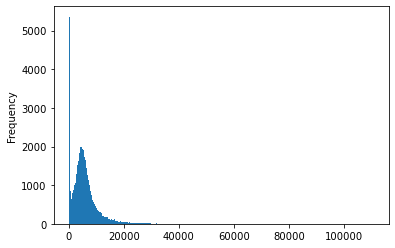

In [46]:
df_seg_volumes[df_seg_volumes['volume'] > 100]['volume'].plot.hist(bins=500)

In [49]:
df_growthrate = pd.read_csv(output_csv)

In [50]:
df_growthrate

,Unnamed: 0,track_id,frame,z,y,x,seg_id,volume,volume_diff
0,0,0.0,0.0,6.179707,499.464321,533.593679,0,6138.0,NaN
1,1,0.0,1.0,6.422046,500.403791,525.238211,0,5589.0,-549.0
2,2,0.0,2.0,6.178361,502.120924,518.179604,0,5968.0,379.0
3,3,0.0,3.0,6.262217,503.862762,518.381381,0,7213.0,1245.0
4,4,0.0,4.0,6.947655,493.678760,513.840071,0,6203.0,-1010.0
...,...,...,...,...,...,...,...,...,...
22634,22634,2262.0,113.0,46.234082,421.007148,749.998178,0,268.0,243.0
22635,22635,2263.0,112.0,44.492121,531.569231,176.115386,0,25.0,NaN
22636,22636,2263.0,113.0,47.010114,534.908090,178.245956,0,268.0,243.0
22637,22637,2264.0,112.0,44.319506,424.380952,216.138096,0,25.0,NaN


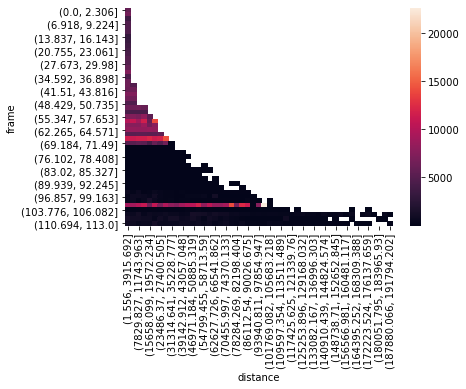

In [56]:
    df_growthrate[['mean_z', 'mean_y', 'mean_x']] = \
        df_growthrate.groupby(['frame'])[['z', 'y', 'x']].transform('mean')

    df_growthrate['distance'] = np.sum(
            (
                df_growthrate[['z', 'y', 'x']].values 
                    - df_growthrate[['mean_z', 'mean_y', 'mean_x']].values
            )**2,
         axis=1)

    nbins = 50

    v = df_growthrate.groupby([
        pd.cut(df_growthrate["frame"], np.linspace(df_growthrate['frame'].min(), df_growthrate['frame'].max(), nbins)),
        pd.cut(df_growthrate['distance'], np.linspace(df_growthrate['distance'].min(), df_growthrate['distance'].max(), nbins))
    ])['volume'].mean()

    heatmap = v.unstack()

    ax = sns.heatmap(heatmap)

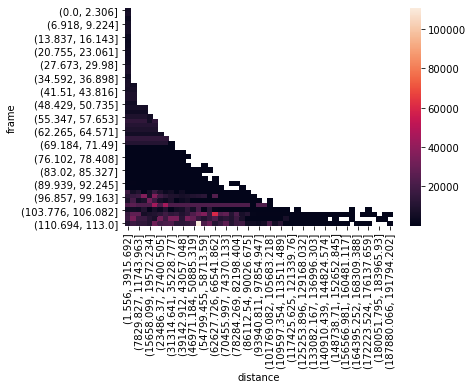

In [57]:
    df_growthrate[['mean_z', 'mean_y', 'mean_x']] = \
        df_growthrate.groupby(['frame'])[['z', 'y', 'x']].transform('mean')

    df_growthrate['distance'] = np.sum(
            (
                df_growthrate[['z', 'y', 'x']].values 
                    - df_growthrate[['mean_z', 'mean_y', 'mean_x']].values
            )**2,
         axis=1)

    nbins = 50

    v = df_growthrate.groupby([
        pd.cut(df_growthrate["frame"], np.linspace(df_growthrate['frame'].min(), df_growthrate['frame'].max(), nbins)),
        pd.cut(df_growthrate['distance'], np.linspace(df_growthrate['distance'].min(), df_growthrate['distance'].max(), nbins))
    ])['volume'].max()

    heatmap = v.unstack()

    ax = sns.heatmap(heatmap)

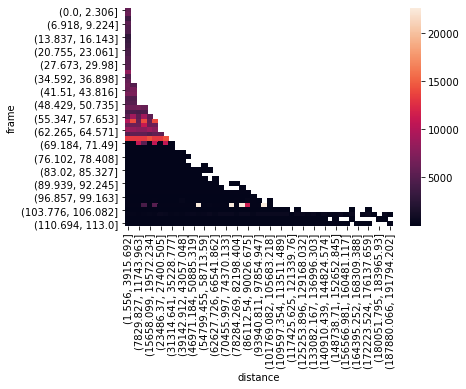

In [58]:
    df_growthrate[['mean_z', 'mean_y', 'mean_x']] = \
        df_growthrate.groupby(['frame'])[['z', 'y', 'x']].transform('mean')

    df_growthrate['distance'] = np.sum(
            (
                df_growthrate[['z', 'y', 'x']].values 
                    - df_growthrate[['mean_z', 'mean_y', 'mean_x']].values
            )**2,
         axis=1)

    nbins = 50

    v = df_growthrate.groupby([
        pd.cut(df_growthrate["frame"], np.linspace(df_growthrate['frame'].min(), df_growthrate['frame'].max(), nbins)),
        pd.cut(df_growthrate['distance'], np.linspace(df_growthrate['distance'].min(), df_growthrate['distance'].max(), nbins))
    ])['volume'].median()

    heatmap = v.unstack()

    ax = sns.heatmap(heatmap)

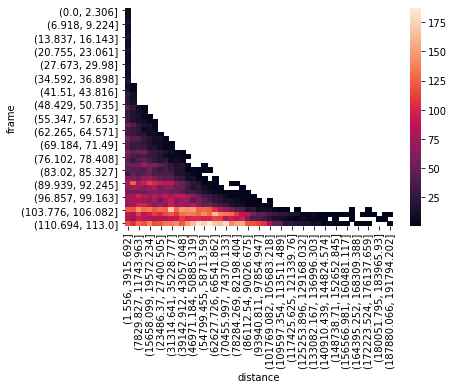

In [61]:
    df_growthrate[['mean_z', 'mean_y', 'mean_x']] = \
        df_growthrate.groupby(['frame'])[['z', 'y', 'x']].transform('mean')

    df_growthrate['distance'] = np.sum(
            (
                df_growthrate[['z', 'y', 'x']].values 
                    - df_growthrate[['mean_z', 'mean_y', 'mean_x']].values
            )**2,
         axis=1)

    nbins = 50

    v = df_growthrate.groupby([
        pd.cut(df_growthrate["frame"], np.linspace(df_growthrate['frame'].min(), df_growthrate['frame'].max(), nbins)),
        pd.cut(df_growthrate['distance'], np.linspace(df_growthrate['distance'].min(), df_growthrate['distance'].max(), nbins))
    ])['volume'].count()

    heatmap = v.unstack()
    heatmap[heatmap == 0] = np.nan

    ax = sns.heatmap(heatmap)

In [ ]:
#    df = pd.DataFrame(tracks, columns=['track_id', 'frame', 'z', 'y', 'x'])

    df['seg_id'] = -1

    root_path = Path(args.prediction_folder)


    for i, frame in tqdm(enumerate(df['frame'].unique())):
        print(int(frame)+1)
        candidates = sorted(root_path.glob(args.prediction_file_pattern.format(frame=int(frame+1))))
        print(candidates)
        assert(len(candidates) == 1)
        filename = candidates[0]
        im = imread(str(filename))
        
        belongs_to_frame = df['frame'] == frame
        df_ = df[['z', 'y', 'x']][belongs_to_frame]
        print(len(df_), np.max(im))
        values = (df_.values * args.factor).astype('int')
        if (not args.transl_csv is None) and (not args.crop_csv is None):
            z = values[:, 0] + int(transl[i, 2] - crop[i, 2])
            y = values[:, 1] + int(transl[i, 1] - crop[i, 1])
            x = values[:, 2] + int(transl[i, 0] - crop[i, 0])
        else:
            z = values[:, 0]
            y = values[:, 1]
            x = values[:, 2]

        
        label_ = im[z, y, x]
        df.at[belongs_to_frame, 'seg_id'] = label_
        
        props = regionprops(im)
        area = np.asarray([p.area for p in props])
        
        _, inv_order = np.unique(label_, return_inverse=True)
        df.at[belongs_to_frame, 'volume'] = area[inv_order]

    for i, row in df.iterrows():
        if i > 0 and (df.loc[i-1, 'track_id'] == df.loc[i, 'track_id']):
            df.loc[i, 'volume_diff'] = df.loc[i, 'volume'] - df.loc[i-1, 'volume']
        else:
            df.loc[i, 'volume_diff'] = np.nan

    output_name = Path(args.output_csv)

    if not output_name.parent.is_dir():
        output_name.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(output_name)


if __name__ == '__main__':
    main()